In [25]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [26]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [27]:
fashion_train.shape

(60000, 785)

In [28]:
X_train_fashion=fashion_train.drop('label',axis=1)
y_train_fashion=fashion_train['label']
X_test_fashion=fashion_test.drop('label',axis=1)
y_test_fashion=fashion_test['label']

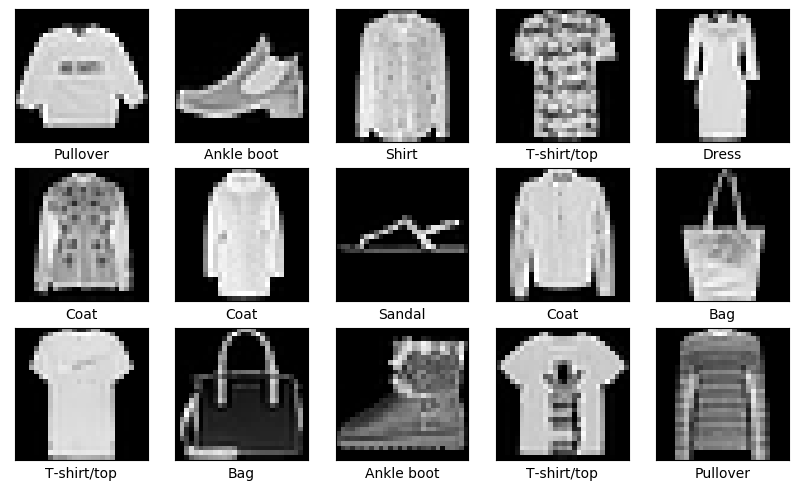

In [29]:
#Reshaping the dataset
x_train_reshape=X_train_fashion.values.reshape(-1,28,28)
x_test_reshape=X_test_fashion.values.reshape(-1,28,28)

#names of clothing accessories in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [30]:
#Encoding Digit MNIST Labels
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [31]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

In [32]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [33]:
#fitting model
history=model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=10,validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/10
600/600 [==============================] - 15s 17ms/step - loss: 1.1123 - accuracy: 0.6333 - val_loss: 0.5345 - val_accuracy: 0.8238
Epoch 2/10
600/600 [==============================] - 9s 14ms/step - loss: 0.7456 - accuracy: 0.7467 - val_loss: 0.4851 - val_accuracy: 0.8334
Epoch 3/10
600/600 [==============================] - 9s 14ms/step - loss: 0.6704 - accuracy: 0.7742 - val_loss: 0.4533 - val_accuracy: 0.8488
Epoch 4/10
600/600 [==============================] - 9s 15ms/step - loss: 0.6281 - accuracy: 0.7890 - val_loss: 0.4452 - val_accuracy: 0.8507
Epoch 5/10
600/600 [==============================] - 8s 13ms/step - loss: 0.6041 - accuracy: 0.7981 - val_loss: 0.4408 - val_accuracy: 0.8496
Epoch 6/10
600/600 [==============================] - 7s 12ms/step - loss: 0.5846 - accuracy: 0.8047 - val_loss: 0.4373 - val_accuracy: 0.8497
Epoch 7/10
600/600 [==============================] - 7s 12ms/step - loss: 0.5762 - accuracy: 0.8092 - val_loss: 0.4203 - val_accuracy: 0.860

In [34]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 2s 4ms/step - loss: 0.4197 - accuracy: 0.8550


In [35]:
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,5))

Fashion MNIST Test accuracy: 0.855


In [36]:
#Predicting the labels-DIGIT
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash,axis=1)
y_test_fash_eval=np.argmax(y_test_fashion,axis=1)

313/313 [==============================] - 2s 5ms/step


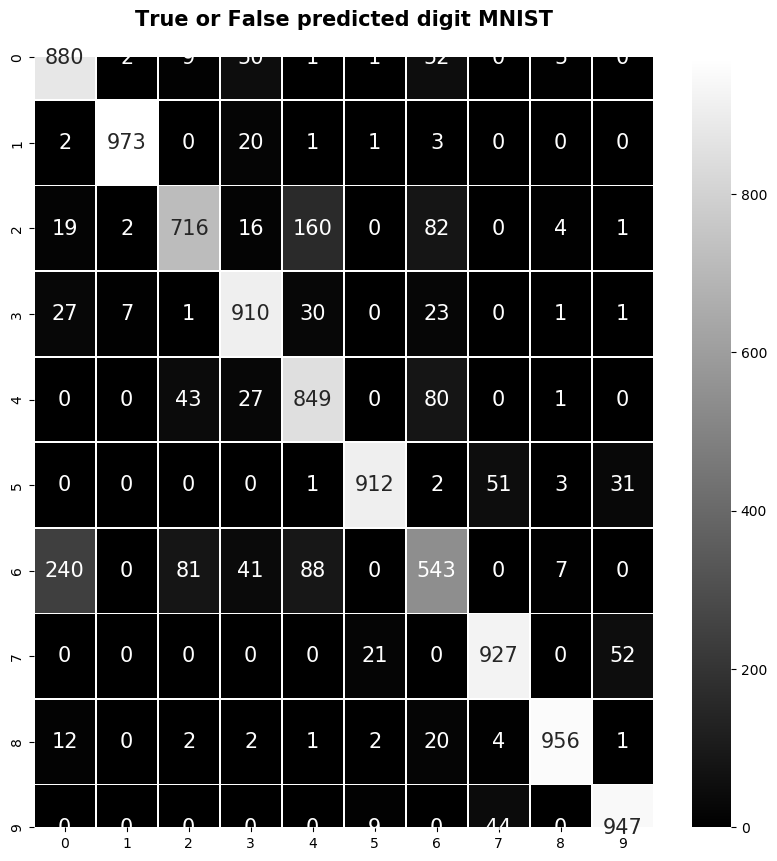

In [14]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.73      0.77      1000
           3       0.84      0.92      0.88      1000
           4       0.72      0.88      0.79      1000
           5       0.98      0.89      0.93      1000
           6       0.74      0.49      0.59      1000
           7       0.92      0.88      0.90      1000
           8       0.93      0.98      0.95      1000
           9       0.86      0.98      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [39]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


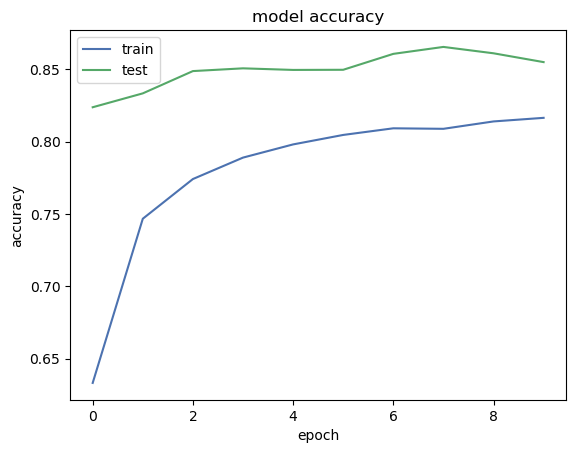

In [40]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

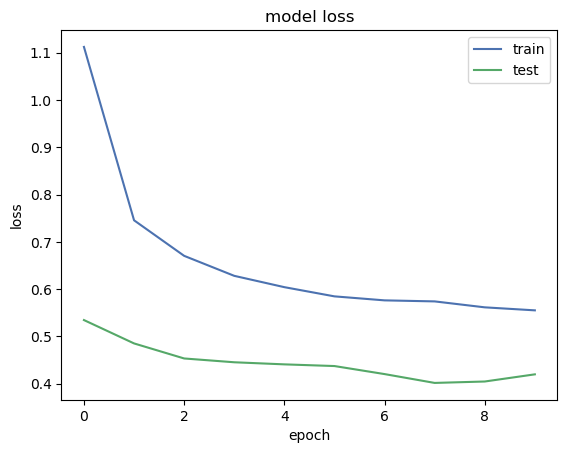

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [42]:
#tf.expand_dims(X_test_digit[0])
y_predict = model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)

1/1 [==============================] - 0s 84ms/step


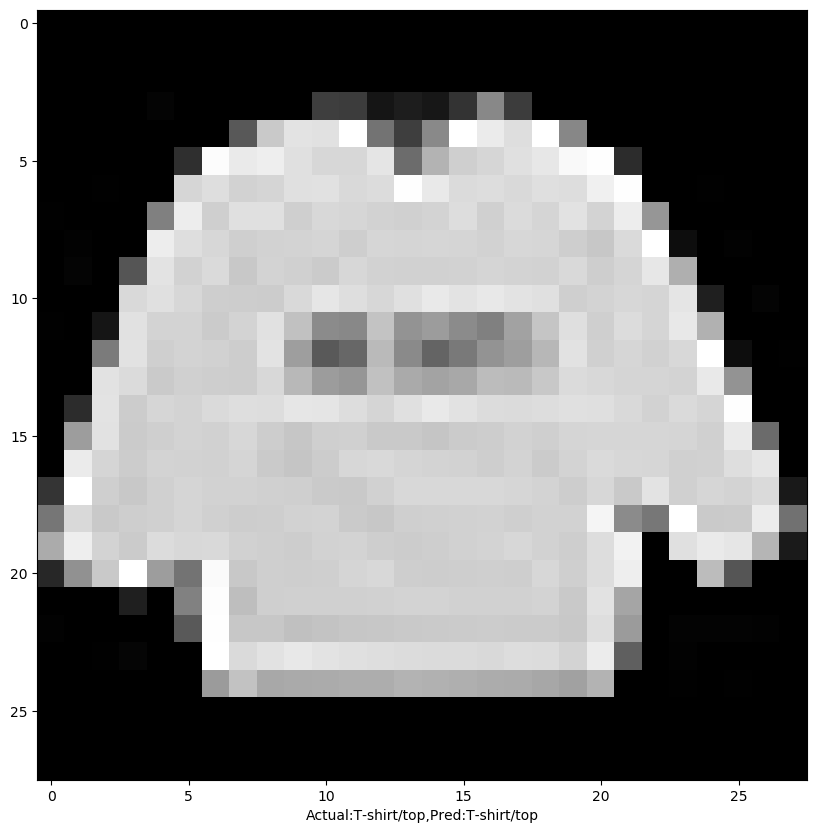

In [55]:
#names of clothing accessories in order
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
#Visualizing the digits
plt.figure(figsize=(10,10))


plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()